# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Описание данных**
Данные геологоразведки трёх регионов находятся в файлах: 

/datasets/geo_data_0.csv. 

/datasets/geo_data_1.csv. 

/datasets/geo_data_2.csv.

id — уникальный идентификатор скважины;

f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);

product — объём запасов в скважине (тыс. баррелей).

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

Загрузим все три датасета

In [2]:
df1 = pd.read_csv('/datasets/geo_data_0.csv')
df2 = pd.read_csv('/datasets/geo_data_1.csv')
df3 = pd.read_csv('/datasets/geo_data_2.csv')

Рассмотрим первый датафрейм

In [3]:
df1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
df1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


Проверим на наличие пропуски и корректность типов данных

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


Пропусков нет, типы данных в порядке, проверим на дубликаты

In [6]:
df1.duplicated().sum()

0

Дубликатов нет, построим гистограмму

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

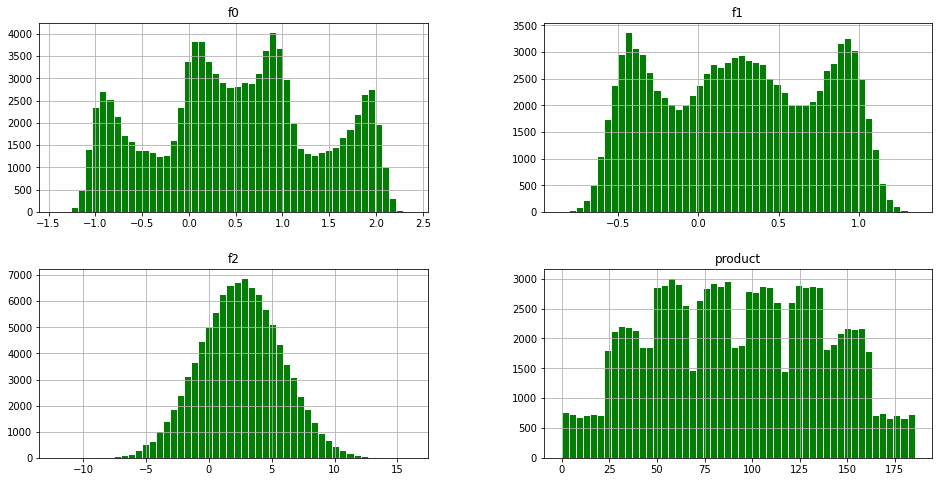

In [7]:
df1.hist(bins=50, figsize=(16, 8), color='green', edgecolor='white')

Построим матрицу корреляции

Проанализировав первую таблицу, дубликаты не обнаружили, типы данных в порядке, пропусков нет, выбросов нет, корреляционная зависимость отсутвует, проанализируем df2 и df3 таким же образом

In [8]:
display(df2.head())
display(df2.describe())
display(df2.info())
print('Дубликаты:', df2.duplicated().sum())

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Дубликаты: 0


Дубликатов нет, пропусков нет, типы данных корректны

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

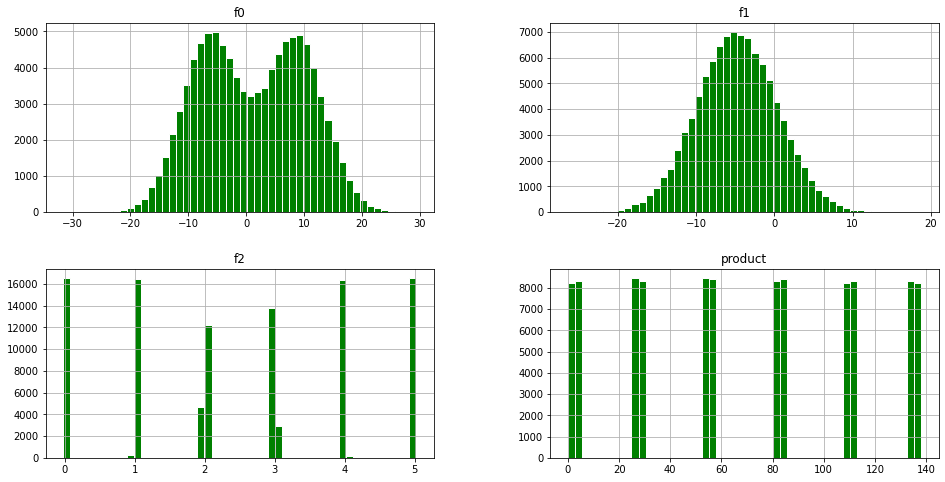

In [9]:
df2.hist(bins=50, figsize=(16, 8), color='green', edgecolor='white')

f0 имеет бимодальное распределение, а f1 - нормальное, выбросов нет

In [10]:
df2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


видим сильную корреляцию между f2 и целевым признаком, к сожалению, причина неизвестна, поэтому оставим так и рассмотрим таблицу 3

In [11]:
display(df3.head())
display(df3.describe())
display(df3.info())
print('Дубликаты:', df3.duplicated().sum())

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

Дубликаты: 0


Здесь тоже все хорошо, данные в порядке

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

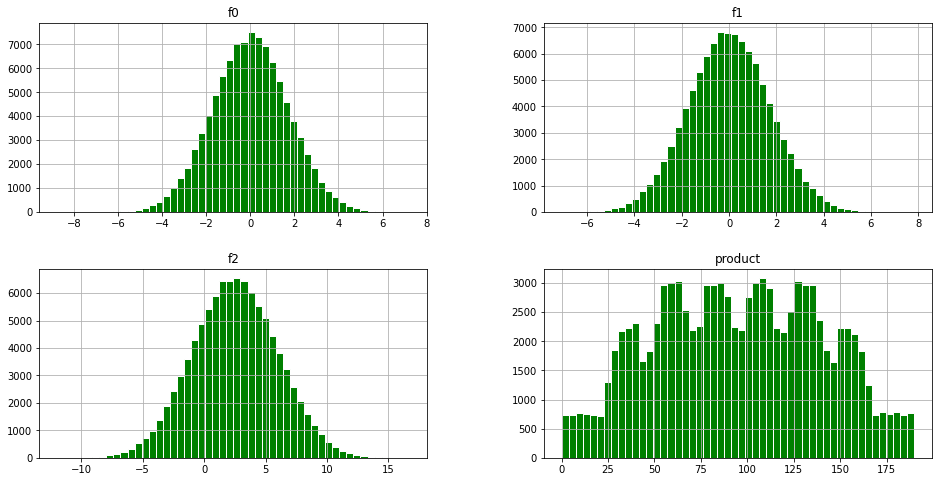

In [12]:
df3.hist(bins=50, figsize=(16, 8), color='green', edgecolor='white')

можем заметить, что данные распределены нормально

In [13]:
df3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


мультиколлинеарность отсутствует

**Вывод: мы видим, что во всех трех датасетах отсутсвуют дубликаты, пропуски, выбросы отсутствуют, но можем заметить сильную корреляцию между f2 и целевым признаком, что может помешать в дальнейшем обучении модели, но причина неизвестна, поэтому оставим данные как есть**

## Обучение и проверка модели

Подготовим данные для обучения модели для нулевого региона:

In [14]:
feature = df1.drop(['id', 'product'], axis=1)
target = df1['product']

In [15]:
RANDOM_STATE=42
X_train, X_valid, y_train, y_valid0 = train_test_split(feature, 
                                                        target, 
                                                        random_state=RANDOM_STATE, 
                                                        test_size=0.25, 
                                                        )

Обучим модель, посчитаем rmse

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [17]:
model_0=LinearRegression()
model_0.fit(X_train_scaled, y_train)

LinearRegression()

In [18]:
prediction0 = model_0.predict(X_valid_scaled)
prediction0 = pd.Series(prediction0, index=y_valid0.index)

In [19]:
print('Для модели нулевого региона:')
print(f'Фактический средний запас сырья: {round(y_valid0.mean(), 2)}')
print(f'Предсказанный средний запас сырья: {round(prediction0.mean(), 2)}')
print(f'RMSE: {round(mean_squared_error(y_valid0, prediction0)**0.5, 2)}')

Для модели нулевого региона:
Фактический средний запас сырья: 92.33
Предсказанный средний запас сырья: 92.4
RMSE: 37.76


Подготовим данные для обучения модели для первого региона:

In [20]:
feature = df2.drop(['id', 'product'], axis=1)
target = df2['product']
RANDOM_STATE=42
X_train, X_valid, y_train, y_valid1 = train_test_split(feature, 
                                                        target, 
                                                        random_state=RANDOM_STATE, 
                                                        test_size=0.25, 
                                                        )

обучим модель

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [22]:
model_1=LinearRegression()
model_1.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
prediction1 = model_1.predict(X_valid_scaled)
prediction1 = pd.Series(prediction1, index=y_valid1.index)
print('Для модели первого региона:')
print(f'Фактический средний запас сырья: {round(y_valid1.mean(), 2)}')
print(f'Предсказанный средний запас сырья: {round(prediction1.mean(), 2)}')
print(f'RMSE: {round(mean_squared_error(y_valid1, prediction1)**0.5, 2)}')

Для модели первого региона:
Фактический средний запас сырья: 68.73
Предсказанный средний запас сырья: 68.71
RMSE: 0.89


Подготовим данные для обучения модели для второго региона:

In [24]:
feature = df3.drop(['id', 'product'], axis=1)
target = df3['product']
RANDOM_STATE=42
X_train, X_valid, y_train, y_valid2 = train_test_split(feature, 
                                                        target, 
                                                        random_state=RANDOM_STATE, 
                                                        test_size=0.25, 
                                                        )

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

In [26]:
model_2=LinearRegression()
model_2.fit(X_train_scaled, y_train)

LinearRegression()

In [27]:
prediction2 = model_2.predict(X_valid_scaled)
prediction2 = pd.Series(prediction2, index=y_valid2.index)
print('Для модели первого региона:')
print(f'Фактический средний запас сырья: {round(y_valid2.mean(), 2)}')
print(f'Предсказанный средний запас сырья: {round(prediction2.mean(), 2)}')
print(f'RMSE: {round(mean_squared_error(y_valid2, prediction2)**0.5, 2)}')

Для модели первого региона:
Фактический средний запас сырья: 95.15
Предсказанный средний запас сырья: 94.77
RMSE: 40.15


***Вывод:*** Проведя обучение модели и рассчитав метрику RMSE для каждого региона, мы выяснили, что во втором регионе самый маленький RMSE - 0.89, когда в остальных регионах 37.76 и 40.15, что говорит о том, что в этих регионах данные разбросаны сильнее и не отображают реальные запасы сырья

## Подготовка к расчёту прибыли

Все ключевые значения для расчётов сохраним в отдельных переменных.

In [28]:
budget = 10000000000 # бюджет на регион
N = 500 # число скважин для исследолвания
best_count = 200 # число скважин для разработки
cost = 450000 # стоимость 1000 баррелей

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.

In [29]:
result = budget/best_count/cost
print('минимальный объем сырья для безубыточной разработки:', result)

минимальный объем сырья для безубыточной разработки: 111.11111111111111


***Вывод:*** запаса сырья в каждом из из регионов недостаточно, для того чтобы окупить вложения в разработку, так как средние запасы находятся в диапазоне от 68 до 95 тыс. баррелей на регион.

## Расчёт прибыли и рисков 

Напишем функцию для расчета прибыли по выбранным скважинам и предсказаниям моделей. Функция выбирает нужное количнство скважин (count) с максимальным значением предсказаний, суммирует целевой значение объема сырья, соответсвующее этим предсказаняим, и подсчитывает прибыль для полученного объема сырья.

In [30]:
def revenue (target, probabilities, count):
    probabilities_sorted = probabilities.sort_values(ascending=False)
    selected = target[probabilities_sorted.index][:count]
    return (cost*selected.sum() - budget)/1000000

Напишем функцию для нахождения распределения прибыли методом bootstrap c 1000 выборок, подсчета средней прибыли, 95% доверительного интервала и риска убытка.

In [31]:
def btstrap (target, prediction, n):
    state = np.random.RandomState(12345)
    values = []
    for i in range (1000):
        sub_target = target.sample(n, replace=True, random_state=state)
        sub_prediction = prediction[sub_target.index]
        values.append(revenue(sub_target, sub_prediction, best_count))
    values = pd.Series(values)
    value_mean = values.mean() # среднее значение прибыли
    lower = values.quantile(q=0.025) # 2,5% квартиль для подсчета нижней границы 95% доверительного интервала 
    upper = values.quantile(q=0.975) # 97,5% квартиль для подсчета верхней границы 95% доверительного интервала
    risk = (len(values.loc[values < 0])/len(values))*100
    return value_mean, lower, upper, risk       

Рассчитаем прибыль и риски для 0 региона

In [32]:
revenue0, lower0, upper0, risk0 = btstrap(y_valid0, prediction0, N)
print('Средняя прибыль в регионе 0:', round(revenue0,2))
print('95% доверительный интервал средней прибыли в регионе 0:', round(lower0, 2), '-', round(upper0, 2))
print('Риск убытков в регионе 0:', risk0, '%')

Средняя прибыль в регионе 0: 435.93
95% доверительный интервал средней прибыли в регионе 0: -116.23 - 966.5
Риск убытков в регионе 0: 6.1 %


Рассчитаем прибыль и риски для 1 региона

In [33]:
revenue1, lower1, upper1, risk1 = btstrap(y_valid1, prediction1, N)
print('Средняя прибыль в регионе 1:', round(revenue1,2))
print('95% доверительный интервал средней прибыли в регионе 1:', round(lower1, 2), '-', round(upper1, 2))
print('Риск убытков в регионе 1:', round(risk1, 2), '%')

Средняя прибыль в регионе 1: 489.66
95% доверительный интервал средней прибыли в регионе 1: 55.12 - 905.76
Риск убытков в регионе 1: 1.1 %


Рассчитаем прибыль и риски для 2 региона

In [34]:
revenue2, lower2, upper2, risk2 = btstrap(y_valid2, prediction2, N)
print('Средняя прибыль в регионе 2:', round(revenue2,2))
print('95% доверительный интервал средней прибыли в регионе 2:', round(lower2, 2), '-', round(upper2, 2))
print('Риск убытков в регионе 2:', round(risk2, 2), '%')

Средняя прибыль в регионе 2: 403.69
95% доверительный интервал средней прибыли в регионе 2: -153.12 - 952.89
Риск убытков в регионе 2: 7.1 %


**Вывод:** рассчитав среднюю прибыль и риски для каждого региона, мы видим, что наилучшим регионом для для разработки является регион 1, так как тут наименьший риск убытков (1.1%) и наивысший показатель средней прибыли (489.66), и ко всему этому, у 1 региона самый узкий 95% доверительный интервал средней прибыли в регионе 0: 55.12 - 905.76, поэтому, для разработки однозначно нужно выбирать регион 1.

## Общий вывод

Исследование данных по различным регионам позволило сделать следующие выводы:

1. **Анализ данных:**
   - В предоставленных данных отсутствуют пропуски.
   - Распределение данных в столбцах адекватно, критических выбросов не выявлено.
   - Средние объемы запасов по регионам составляют: 68 в регионе 1, 92 в регионе 0 и 94 в регионе 2.

2. **Обучение моделей:**
   - Проведено обучение и валидация моделей на обучающих и валидационных выборках.
   - Лучший результат по точности предсказаний достигнут в регионе 1, где RMSE модели значительно лучше

3. **Оценка прибыли:**
   - С использованием техники bootstrap рассчитаны средняя прибыль и 95% доверительный интервал для каждого региона.
   - Регион 1 показал наивысшую среднюю прибыль (489.66), с наименьшим риском убытков (1.1%).

4. **Рекомендация:**
   - На основании анализа рисков и потенциальной прибыли, рекомендуется выбрать для дальнейшей разработки **регион 1**.
   - Этот выбор обусловлен не только высокой средней прибылью, но и наименьшим риском убытков, а также узким 95% доверительным интервалом для средней прибыли, что подтверждает его предпочтительность в сравнении с остальными регионами.

Таким образом, регион 1 является оптимальным выбором для дальнейшей эксплуатации и разработки на основе представленных данных и анализа.